In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
base_table = pd.read_csv(r'.\data\processed\processed_table.csv')

In [4]:
analysis_df = base_table[base_table['account_year'] < 1997]

In [5]:
for column in analysis_df.columns[0:]:
    print(column)

Unnamed: 0
account_id
account_district_id
account_frequency
account_year
account_month
account_day
account_lor
client_id
client_birth_year
client_birth_month
client_birth_day
client_gender
client_age
client_age_group
client_category
num_disp
District_Code
District_Name
Region
n_inhabitants
municipalities_inh_499
municipalities_500_1999
municipalities_2000_9999
municipalities_10000
n_cities
ratio_urban_inh
average_salary
unemploymant_rate_95
unemploymant_rate_96
entrepreneurs_per_1000
committed_crimes_95
committed_crimes_96
increase_in_unemploymant_rate
increase_in_committed_crimes
decrease_in_unemploymant_rate
decrease_in_committed_crimes
total_municipalities
number_of_employed_population_96
number_of_employed_urban_population_96
num_order
total_order_amount
LEASING
Other
POJISTNE
SIPO
UVER
loan_id
loan_amount
loan_duration
loan_payments
loan_status
loan_year
loan_month
loan_day
cur_loan_Status
loan_category
loan_granted
disp_client_id
card_id
card_type
card_issued_year
card_issued_mon

In [9]:
district_client_card_issued = analysis_df[analysis_df['card_issued_97'] == 1]
district_client_loan_granted = analysis_df[analysis_df['loan_granted'] == 1]

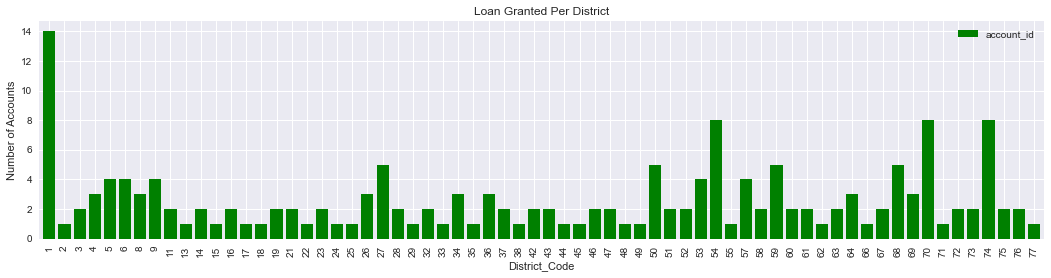

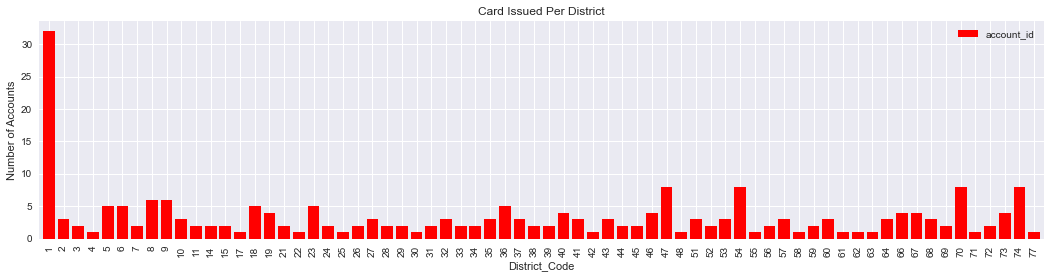

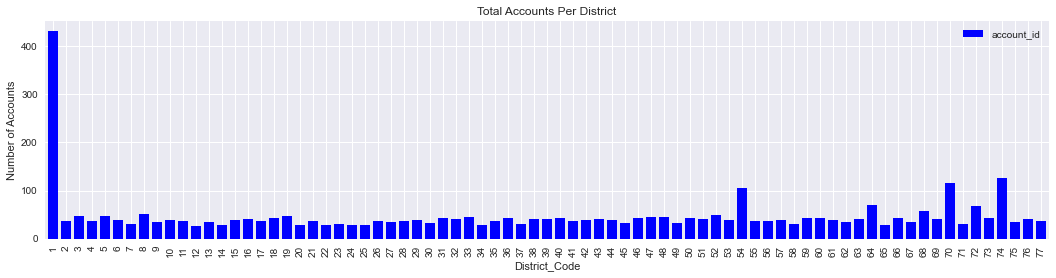

In [85]:
fig, ax = plt.subplots(figsize=(18,4))
ax = district_client_loan_granted.groupby('District_Code')['account_id'].count().plot.bar(color = 'g', width = 0.8, title = 'Loan Granted Per District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Accounts")
ax.legend()

fig, ax1 = plt.subplots(figsize=(18,4))
ax1 = district_client_card_issued.groupby('District_Code')['account_id'].count().plot.bar(color = 'r', width = 0.8, title = 'Card Issued Per District')
ax1.set_xlabel("District_Code")
ax1.set_ylabel("Number of Accounts")
ax1.legend()

fig, ax2 = plt.subplots(figsize=(18,4))
ax2 = analysis_df.groupby('District_Code')['account_id'].count().plot.bar(color = 'b', width = 0.8, title = 'Total Accounts Per District')
ax2.set_xlabel("District_Code")
ax2.set_ylabel("Number of Accounts")
ax2.legend()

In [88]:
district_client_loan_granted['Region'].nunique()

8

C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_28072/3607566891.py:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')


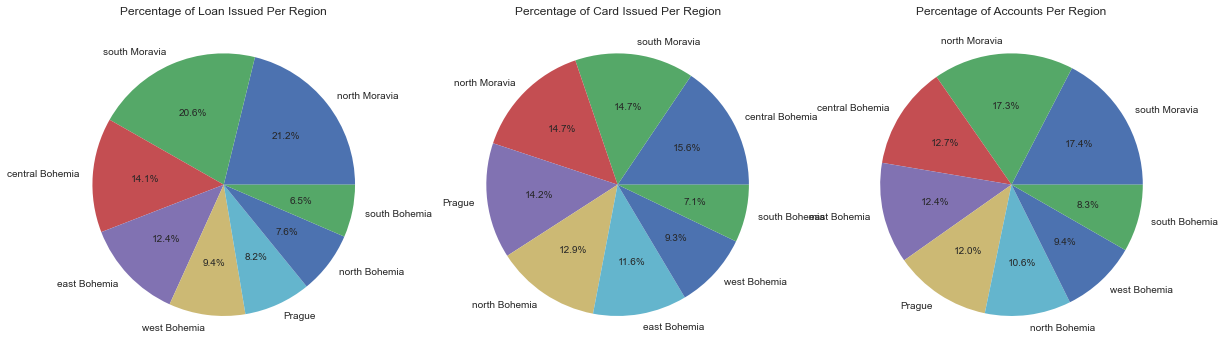

In [112]:
fig, ax = plt.subplots(1, 3,figsize=(20,10))
cnt_incometype = district_client_loan_granted['Region'].value_counts(normalize=True)
ax[0].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[0].set_title('Percentage of Loan Issued Per Region')
cnt_incometype = district_client_card_issued['Region'].value_counts(normalize=True)
ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Card Issued Per Region')
cnt_incometype = analysis_df['Region'].value_counts(normalize=True)
ax[2].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[2].set_title('Percentage of Accounts Per Region')
plt.show()


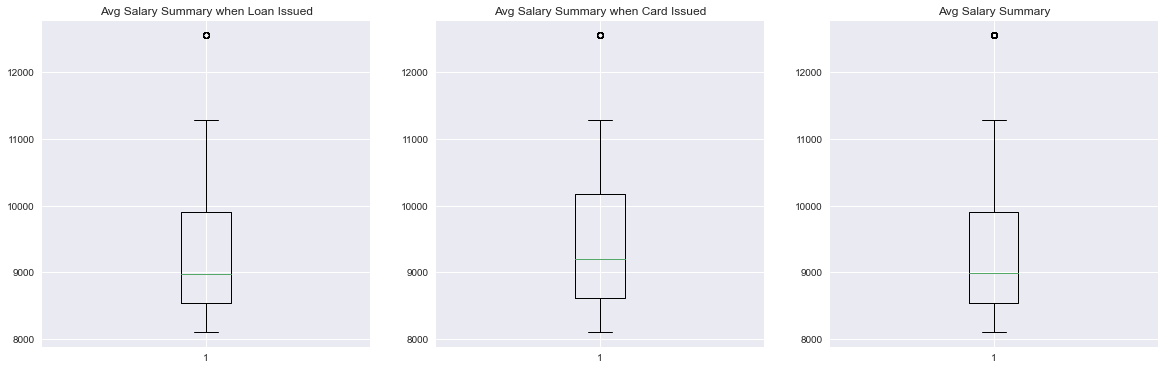

In [117]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['average_salary'])
ax[0].set_title('Avg Salary Summary when Loan Issued')
ax[1].boxplot(district_client_card_issued['average_salary'])
ax[1].set_title('Avg Salary Summary when Card Issued')
ax[2].boxplot(analysis_df['average_salary'])
ax[2].set_title('Avg Salary Summary')
plt.show()

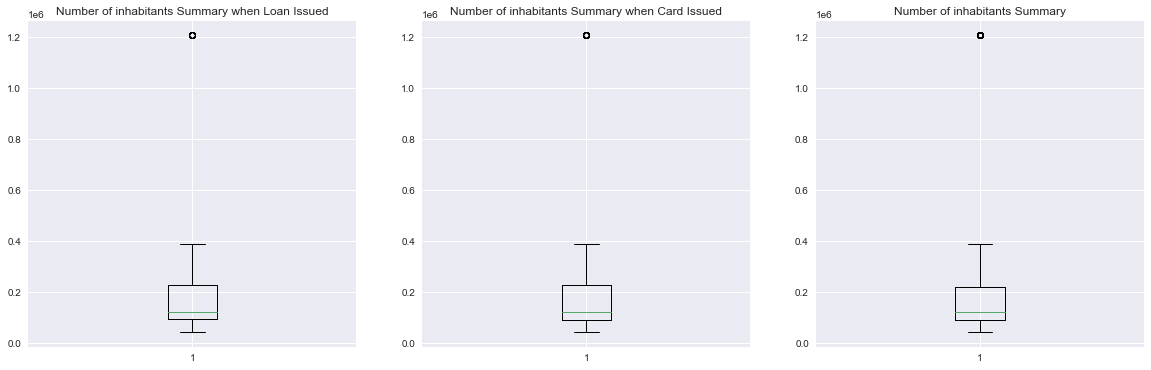

In [119]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['n_inhabitants'])
ax[0].set_title('Number of inhabitants Summary when Loan Issued')
ax[1].boxplot(district_client_card_issued['n_inhabitants'])
ax[1].set_title('Number of inhabitants Summary when Card Issued')
ax[2].boxplot(analysis_df['n_inhabitants'])
ax[2].set_title('Number of inhabitants Summary')
plt.show()


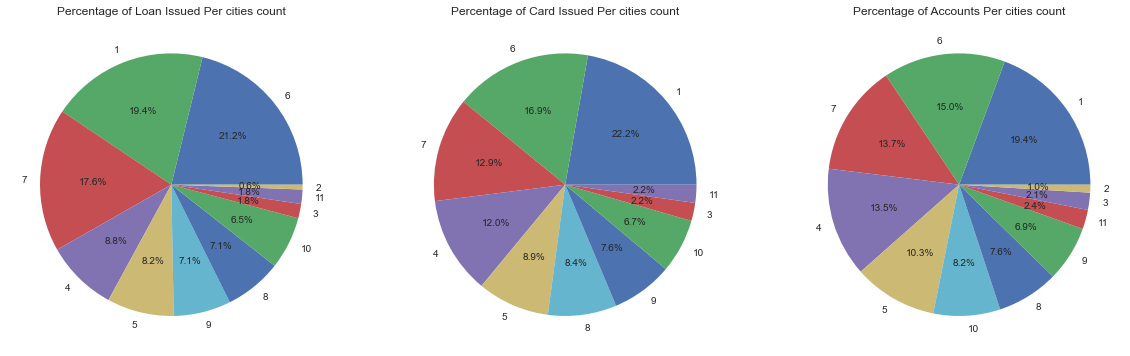

In [125]:
fig, ax = plt.subplots(1, 3,figsize=(20,10))
cnt_incometype = district_client_loan_granted['n_cities'].value_counts(normalize=True)
ax[0].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[0].set_title('Percentage of Loan Issued Per cities count')
cnt_incometype = district_client_card_issued['n_cities'].value_counts(normalize=True)
ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Card Issued Per cities count')
cnt_incometype = analysis_df['n_cities'].value_counts()
ax[2].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[2].set_title('Percentage of Accounts Per cities count')
plt.show()

Text(0, 0.5, 'Number of Accounts')

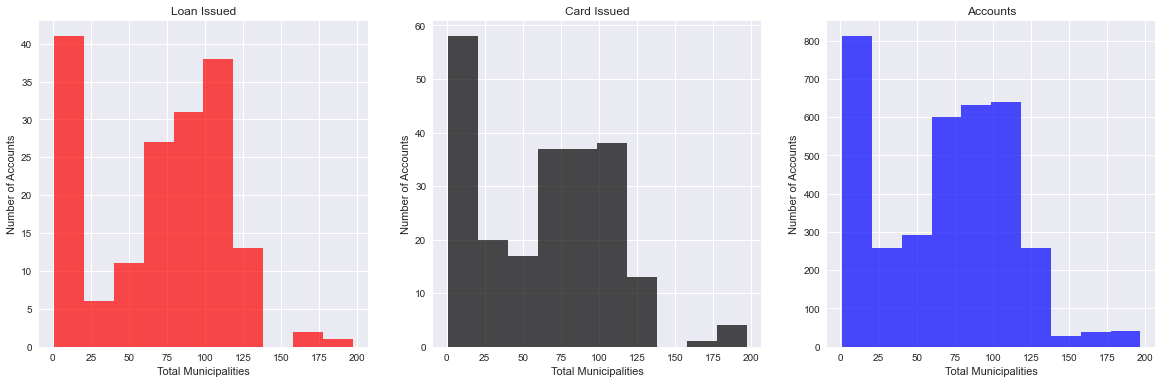

In [133]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].hist(district_client_loan_granted['total_municipalities'], bins=10, color='Red', alpha=0.7, label='total_municipalities')
ax[0].set_title('Loan Issued')  # Title
ax[0].set_xlabel('Total Municipalities')  # X label
ax[0].set_ylabel('Number of Accounts')  # Y label
ax[1].hist(district_client_card_issued['total_municipalities'], bins=10, color='Black', alpha=0.7, label='total_municipalities')
ax[1].set_title('Card Issued')  # Title
ax[1].set_xlabel('Total Municipalities')  # X label
ax[1].set_ylabel('Number of Accounts')  # Y label
ax[2].hist(analysis_df['total_municipalities'], bins=10, color='Blue', alpha=0.7, label='total_municipalities')
ax[2].set_title('Accounts')  # Title
ax[2].set_xlabel('Total Municipalities')  # X label
ax[2].set_ylabel('Number of Accounts')  # Y label


Text(0.5, 1.0, 'Number of Employed Population Summary')

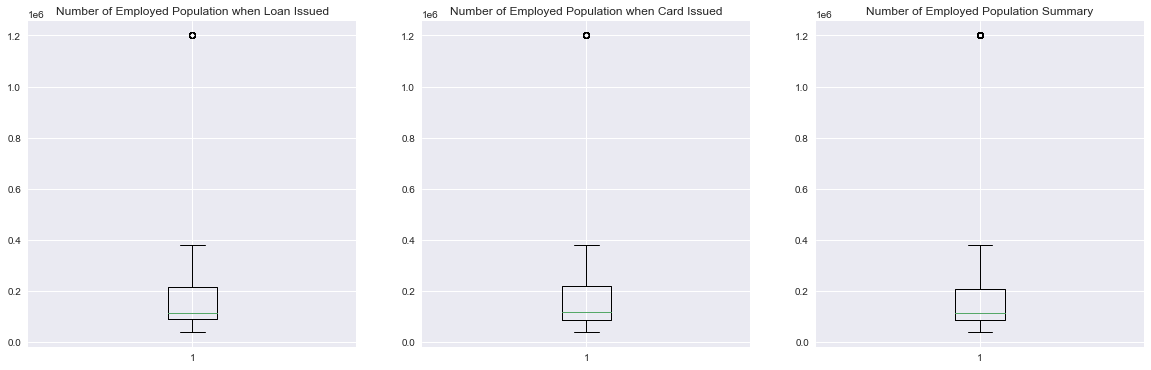

In [137]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['number_of_employed_population_96'])
ax[0].set_title('Number of Employed Population when Loan Issued')
ax[1].boxplot(district_client_card_issued['number_of_employed_population_96'])
ax[1].set_title('Number of Employed Population when Card Issued')
ax[2].boxplot(analysis_df['number_of_employed_population_96'])
ax[2].set_title('Number of Employed Population Summary')

Text(0, 0.5, 'Number of Employed Population')

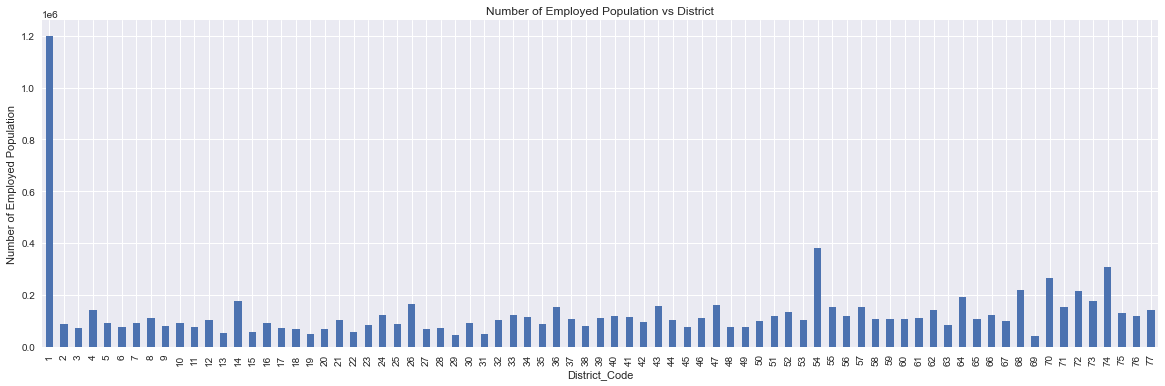

In [152]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['number_of_employed_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Population vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Employed Population")

Text(0, 0.5, 'Number of Employed Urban Population')

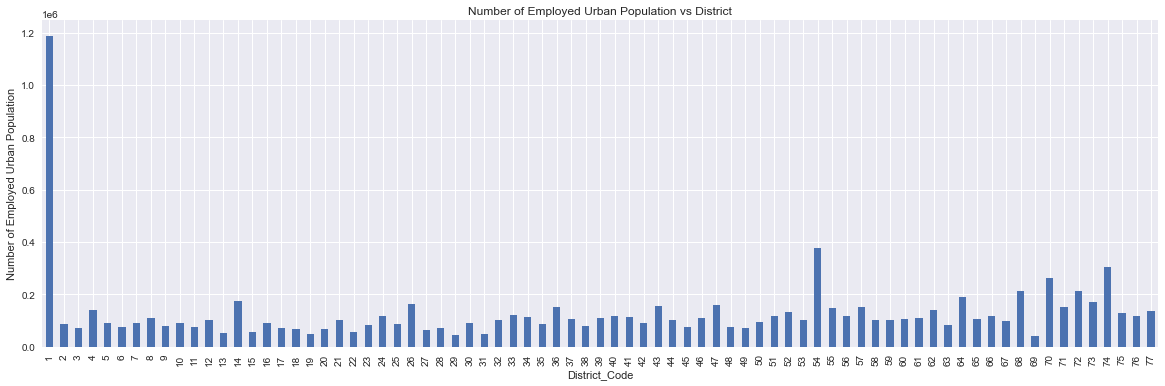

In [153]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['number_of_employed_urban_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Urban Population vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Employed Urban Population")

Text(0, 0.5, 'Increase in Unemployment Rate')

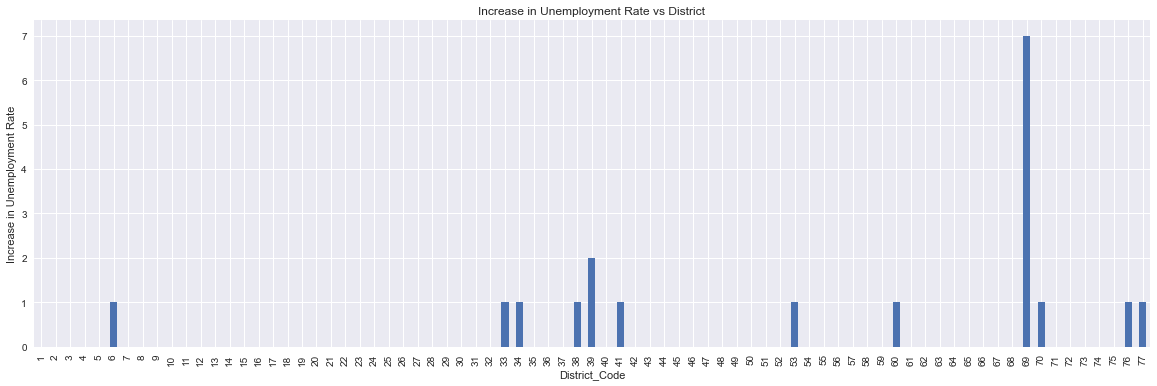

In [155]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['increase_in_unemploymant_rate'].agg('unique').astype(int).plot.bar(title = 'Increase in Unemployment Rate vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Increase in Unemployment Rate")

Text(0, 0.5, 'Decrease in Unemployment Rate')

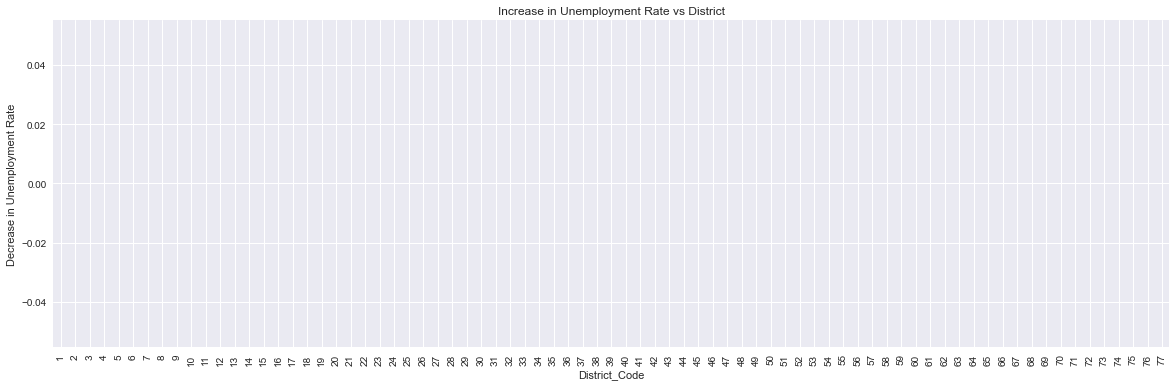

In [158]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['decrease_in_unemploymant_rate'].agg('unique').astype(int).plot.bar(title = 'Increase in Unemployment Rate vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Decrease in Unemployment Rate")

Text(0, 0.5, 'Increase in Commited Crimes')

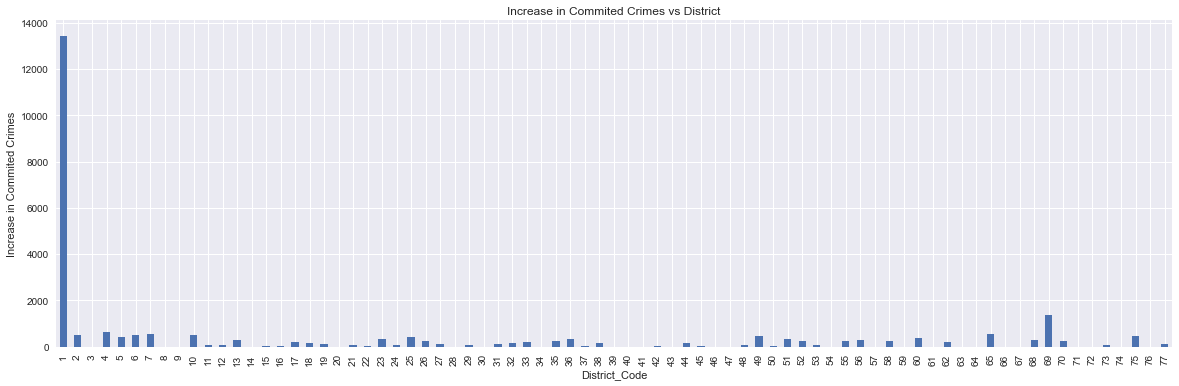

In [156]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['increase_in_committed_crimes'].agg('unique').astype(int).plot.bar(title = 'Increase in Commited Crimes vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Increase in Commited Crimes")

Text(0, 0.5, 'Decrease in Commited Crimes')

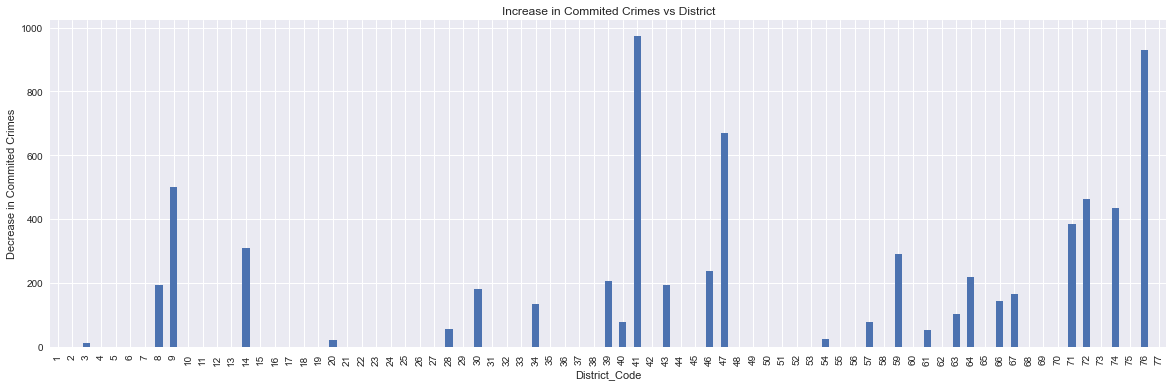

In [157]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['decrease_in_committed_crimes'].agg('unique').astype(int).plot.bar(title = 'Increase in Commited Crimes vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Decrease in Commited Crimes")